# 데이터 전처리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/2-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 넘파이로 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

column_stack() 
- 리스트를 일렬로 세운 다음 차례대로 나란히 연결
- 연결할 리스트는 파이썬의 튜플로 전달

In [3]:
np.column_stack(([1, 2, 3], [4, 5, 6]))     # (3, 2) 의 배열 생성

array([[1, 4],
       [2, 5],
       [3, 6]])

넘파이 배열 데이터 생성

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

데이터 확인

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


- np.ones(): 원하는 개수의 1로 구성된 배열 생성 
- np.zeros(): 원하는 개수의 0으로 구성된 배열 생성

In [8]:
print(np.ones(5))
print(np.zeros(5))

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


타깃 데이터 생성

np.concatenate(): 
- 용도: 지정한 축(axis)을 따라 배열을 결합
- 다차원 배열에도 사용할 수 있음
- 결합하려는 배열들의 차원 수와 크기가 지정된 축을 제외한 모든 축에서 동일해야 함

In [9]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [10]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [11]:
from sklearn.model_selection import train_test_split

- train_test_split(): 기본적으로 25%를 테스트 세트로 분할
- random_state = 랜덤 시드를 지정하는 매개변수

In [12]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [13]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [14]:
print(train_target.shape, test_target.shape)

(36,) (13,)


테스트 데이터 출력

In [15]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- 도미 35마리, 빙어 14마리로 두 생선의 비율은 2.5: 1 인데, 테스트 세트의 도미와 빙어의 비율은 3.3:1 이므로, 샘플링 편향이 있다.

데이터 분할 시각화 

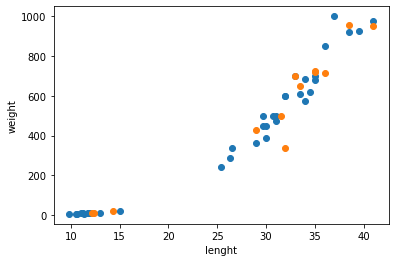

In [17]:
import matplotlib.pyplot as plt 

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

- 훈련 세트와 테스트 세트의 샘플의 클래스 비율이 일정하지 ㅇ낳다면 모델이 일부 샘플을 올바르게 학습할 수 없다. 
- stratify: 타깃데이터를 전달해서 클래스 비율에 맞게 데이터를 분할하도록 하는 매개변수

In [18]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42
)

In [19]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


데이터 분할 시각화

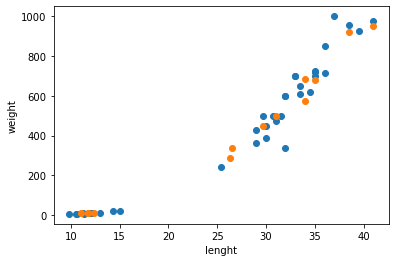

In [20]:
import matplotlib.pyplot as plt 

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

## 수상한 도미 한마리

k-최근접 이웃 모델 훈련

In [22]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

- 길이가 25, 무게가 150인 도미데이터로 결과 예측했을 때 빙어로 출력되는 문제 발생

In [23]:
print(kn.predict([[25, 150]]))

[0.]


해당 샘플과 다른 데이터를 산점도로 확인

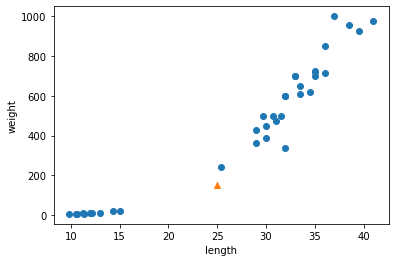

In [24]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- k-최근접 이웃은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용 
- kneighbors(): 이웃까지의 거리와 이웃 샘플의 인덱스를 반환해주는 매서드로 기본적으로 5개의 이웃 반환

In [25]:
distances, indexes = kn.kneighbors([[25, 150]])

- indexes 배열을 사용해 훈련 데이터 중에서 이웃 샘플을 따로 구분해서 그림

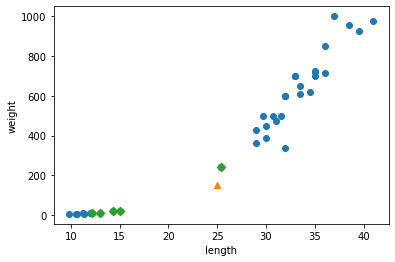

In [27]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 가장 가까운 이웃에 도미가 하나밖에 포함되지 않음

In [28]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [29]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [30]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춰라

- x축의 범위는 10~40 이고 y축의 범위는 0~1000
- x축의 범위를 동일하게 0~1000으로 맞춰서 시각화

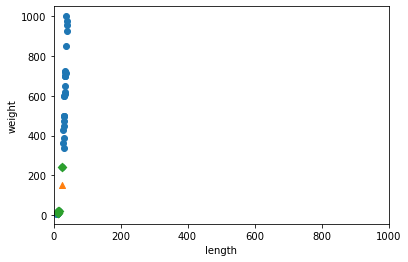

In [31]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- x축은 가장 가까운 이웃을 찾는데 크게 영향을 미치지 못하고 오로지 y축(생선의 무게)만 고려 대상이 되었다.
- 이를 두 특성의 scale이 다르다고 표현한다. 
- 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다. 

데이터 전처리 
- 데이터 특성값을 일정한 기준으로 맞춰주는 작업 
- 분산: 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 낸 값
- 표준편차: 분산의 제곱근으로 데이터가 분산된 정도를 나타냄 
- 표준점수(z점수): 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄 

In [32]:
mean = np.mean(train_input, axis=0)     # 평균  , axis => 각 특성별로 계산해야함
std = np.std(train_input, axis=0)       # 표준편차

In [33]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


표준점수 구하기

In [34]:
train_scaled = (train_input - mean) / std

## 전처리 데이터로 모델 훈련하기

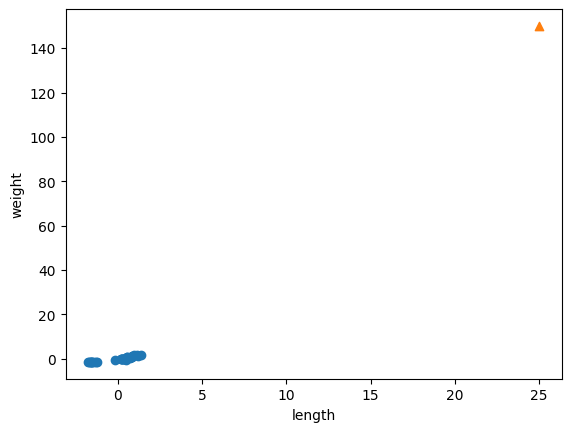

In [29]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
new = ([25, 150] - mean) / std

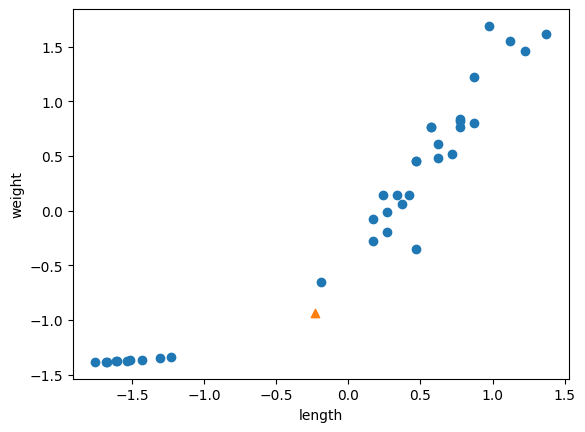

In [31]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [36]:
test_scaled = (test_input - mean) / std

In [37]:
kn.score(test_scaled, test_target)

1.0

In [39]:
print(kn.predict([new]))

[1.]


In [40]:
distances, indexes = kn.kneighbors([new])

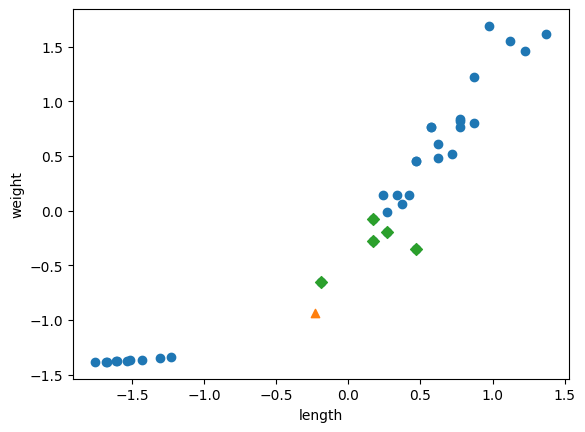

In [37]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()